In [98]:
"""
HW 1
"""

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt


# Consider the ODE

In [99]:


def true_y(t):

    return (np.pi * np.e**(3*(np.cos(t) - 1)) )/ np.sqrt(2)

def dydt (y_n, t_n):
    
    return -3*y_n*np.sin(t_n)

y_0 = np.pi/np.sqrt(2)

In [100]:
# ONE DELTA
def FE(y0, delta_t, f):

    t = np.arange(0, 5 + delta_t, delta_t)
    y = np.empty_like(t)
    y[0] = y0

    for n in range(len(t)-1):
        y[n+1] = y[n] + delta_t * f(y[n], t[n])
    return t, y
    #return np.array([t.T,results.T])

In [101]:
time_steps, results = FE(y_0, 2**(-2), dydt)
print(time_steps, results)

real_y =  true_y(time_steps)
print(real_y.shape)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.  ] [2.22144147e+00 2.22144147e+00 1.80924641e+00 1.15869721e+00
 5.66337512e-01 2.08920074e-01 6.02236213e-02 1.51690511e-02
 3.97445126e-03 1.26398253e-03 5.26379335e-04 2.90111808e-04
 2.07068538e-04 1.85152402e-04 2.00176844e-04 2.52840854e-04
 3.61226393e-04 5.66259169e-04 9.46356117e-04 1.64017482e-03
 2.86943598e-03]
(21,)


<function matplotlib.pyplot.show(close=None, block=None)>

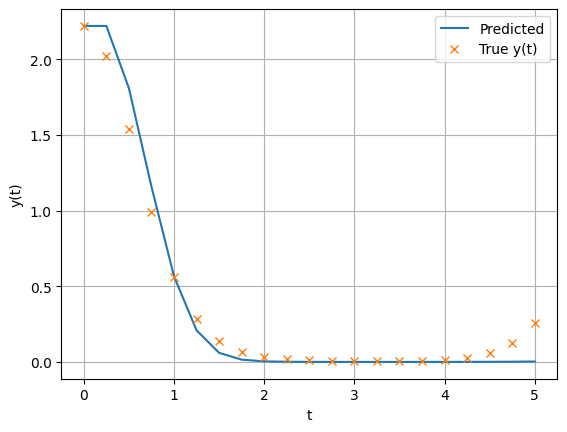

In [102]:
plt.plot(time_steps, results, '-', label='Predicted')
plt.plot(time_steps, real_y, 'x', label='True y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show

In [103]:
# For each of these delta_t values calculate the error E = mean(abs(y_true - y_num))

all_deltas = [2**(-2), 2**(-3), 2**(-4), 2**(-5), 2**(-6), 2**(-7), 2**(-8)]
all_error_mean = []
for delta in all_deltas:
    t, y_num = FE(y_0, delta, dydt) 
    #print(delta ,y_num.shape)
    y_true = true_y(t)
    E = np.mean(abs(y_true - y_num))
    all_error_mean.append(E)

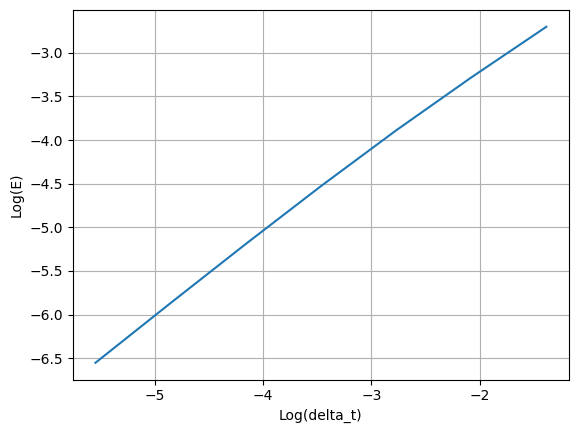

0.9286362856033622


In [105]:
# Plot log(delta_t) on the x axis and Log(E) on the y axis.

plt.plot(np.log(all_deltas), np.log(all_error_mean))
plt.xlabel('Log(delta_t)')
plt.ylabel('Log(E)')
plt.grid(True)
plt.show()
# Using Polyfit find the slope of the best fit line through this data. This is the order of the forward Euler method.

slope, intercept = np.polyfit(np.log(all_deltas), np.log(all_error_mean), 1)

print(slope)

In [94]:
# Save your last numerical solution delta_t = 2**-8 as a column vector A1.
# Save th error values in a row vector with 7 components in A2
A1_t, A1 = FE(y_0, delta, dydt)

A1 = A1.reshape(-1,1)
print(A1.shape)

A2 = np.array(all_error_mean)
print(A2.shape)

A3 = slope
print(A3)

(1281, 1)
(7,)
11.409275012206965


Solve the ODE numerically using Heun's method:

In [91]:
def heun(y0, delta_t, f):
    t = np.arange(0, 5 + delta_t, delta_t)
    y = np.empty_like(t)
    y[0] = y0

    for n in range(len(t)-1):
        y_pred = y[n] + delta_t * f(y[n], t[n])
        y[n+1] = y[n] + 0.5*delta_t*(f(y[n], t[n]) + f(y_pred, t[n] + delta_t))

    return t, y

In [92]:
all_deltas = [2**(-2), 2**(-3), 2**(-4), 2**(-5), 2**(-6), 2**(-7), 2**(-8)]
all_error_mean_heun = []
for delta in all_deltas:
    t, y_num = heun(y_0, delta, dydt) 
    #print(delta ,y_num.shape)
    y_true = true_y(t)
    E = np.mean(abs(y_true - y_num))
    all_error_mean_heun.append(E)

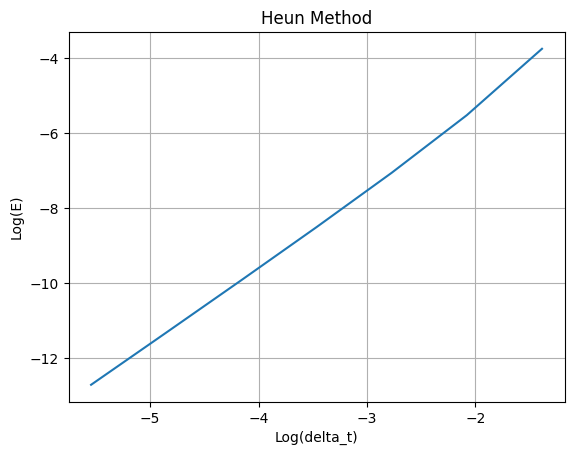

2.1324963825282977


In [93]:
plt.plot(np.log(all_deltas), np.log(all_error_mean_heun))
plt.title('Heun Method')
plt.xlabel('Log(delta_t)')
plt.ylabel('Log(E)')
plt.grid(True)
plt.show()
# Using Polyfit find the slope of the best fit line through this data. This is the order of the forward Euler method.

slope_heun, intercept_heun = np.polyfit(np.log(all_deltas), np.log(all_error_mean_heun), 1)

print(slope_heun)

In [95]:
A4_t, A4 = heun(y_0, delta, dydt)

A4 = A4.reshape(-1,1)
print(A4.shape)

A5 = np.array(all_error_mean_heun)
print(A5.shape)

A6 = slope_heun
print(A6)

(1281, 1)
(7,)
2.1324963825282977


<function matplotlib.pyplot.show(close=None, block=None)>

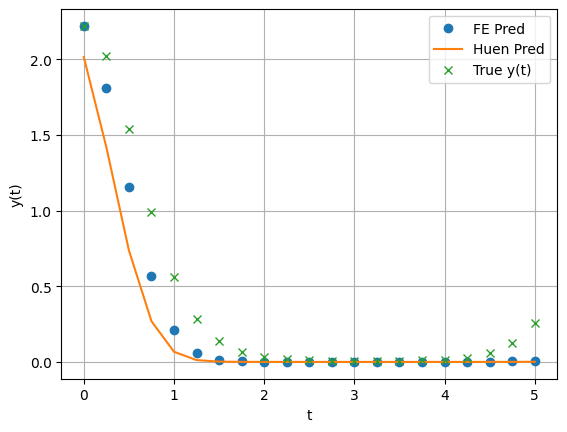

In [44]:
# Plot at 2**-2 timesteps in comparison to real, interested that FE closer.
plt.plot(time_steps, FE(y_0, 2**-2, dydt)[1], 'o', label='FE Pred')
plt.plot(time_steps, heun(y_0, 2**-2, dydt)[1], '-', label='Huen Pred')
plt.plot(time_steps, real_y, 'x', label='True y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show

In [45]:
print(A2)
print(A5)

[[0.11159213 0.06169789 0.03253887 0.01672603 0.00848239 0.00427178
  0.00214363]]
[[0.18458866 0.10086704 0.0525975  0.02680236 0.01352026 0.00678893
  0.00340153]]


# Consider the van der Pol Oscillator

In [46]:
def van_der_pol(t, w, epsilon):
    
    w1 = w[0]
    w2 = w[1]
    dw1dt = w2 # so on initial condition this would just return y'(0) = 1 ??

    dw2dt = -w1 -epsilon*((w1**2)-1)*w2
    
    #print(dw1dt, dw2dt)
    return [dw1dt, dw2dt] # initial condition y(0) = sqrt(3), y'(0) = 1


In [47]:
# USING FitzHugh Implementation as reference

t_eval = np.arange(0, 32.5, 0.5)
w0 = [np.sqrt(3.0), 1.0]
epsilon = 0.1
#print(t_span[-1])
vdp_solutions = []
for epsilon in [0.1, 1.0, 20.0]:
    sol = solve_ivp(
        van_der_pol,
        args=(epsilon,),
        t_span=(float(t_eval[0]), float(t_eval[-1])),
        y0=w0,
        #method='LSODA',
        t_eval = t_eval
    )
    vdp_solutions.append(sol.y[0]) # sol.y[0] should be y(t)
A7 = np.column_stack(vdp_solutions)

print(A7.shape)

(65, 3)


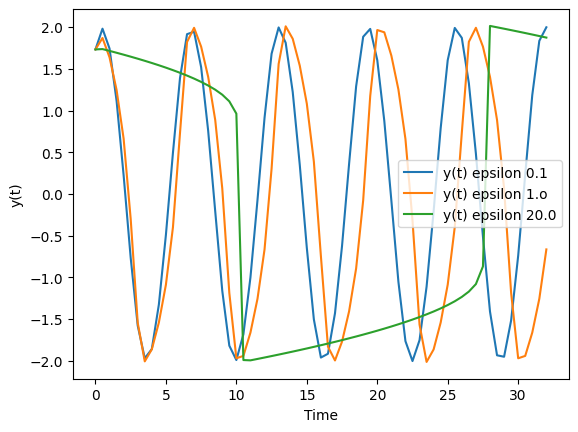

In [48]:
plt.plot(t_eval, vdp_solutions[0], label='y(t) epsilon 0.1')
plt.plot(t_eval, vdp_solutions[1], label='y(t) epsilon 1.o')
plt.plot(t_eval, vdp_solutions[2], label='y(t) epsilon 20.0')
#plt.plot(sol.t, sol.y[1], label='w(t)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()

# (b) Using the time span t = [0, 32]....


In [49]:
# TEST
TOL = 1e-4

b_sol = sol = solve_ivp(
        van_der_pol,
        args=(1.0,),
        t_span=(0, 32),
        y0=[2.0, np.pi**2],
        #method='LSODA',
        #t_eval = t_eval
    )
T = b_sol.t # what does this give me? tolerance??
Y = b_sol.y
#print(np.diff(T))
print(np.mean(np.diff(T)))

0.38554216867469876


In [50]:
# Calculate the average step_size t needed to solve the problem for each of the following tolerance values.

tol_values = [10**(-i) for i in range(4, 11)]
mean_step_size =[]
for tolerance in tol_values:
    b_sol = sol = solve_ivp(
        van_der_pol,
        args=(1.0,),
        t_span=(0, 32),
        y0=[2.0, np.pi**2],
        #method='LSODA',
        #t_eval = t_eval,
        atol=tolerance,
        rtol=tolerance
        )
    T = b_sol.t # what does this give me? tolerance??
    Y = b_sol.y
    mean_step_size.append(np.mean(np.diff(T)))
print(len(mean_step_size))
print(mean_step_size)

7
[0.3076923076923077, 0.2064516129032258, 0.13559322033898305, 0.08839779005524862, 0.05734767025089606, 0.036613272311212815, 0.023205221174764323]


5.337412351161906


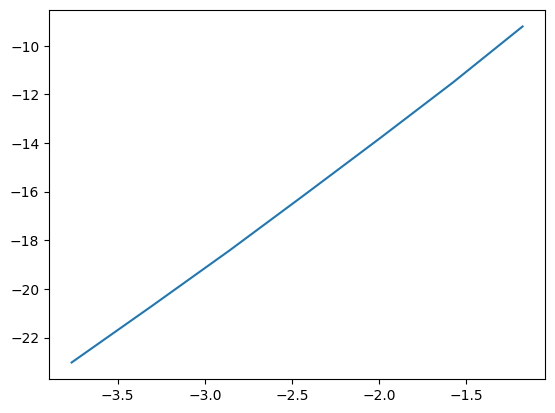

In [51]:
# Plot log(delta_t) on x-axis and log(TOL) on y axis. use polyfit find the slope

plt.plot(np.log(mean_step_size), np.log(tol_values))
slope, intercept = np.polyfit(np.log(mean_step_size), np.log(tol_values), 1)
print(slope)

A8 = slope

In [52]:
A9A10 = []
for method in ['RK23', 'LSODA']:
    mean_step_size =[]
    for tolerance in tol_values:
        b_sol = sol = solve_ivp(
            van_der_pol,
            args=(1.0,),
            t_span=(0, 32),
            y0=[2.0, np.pi**2],
            method=method,
            #t_eval = t_eval,
            atol=tolerance,
            rtol=tolerance
            )
        T = b_sol.t # what does this give me? tolerance??
        Y = b_sol.y
        mean_step_size.append(np.mean(np.diff(T)))
    slope, intercept = np.polyfit(np.log(mean_step_size), np.log(tol_values), 1)
    #print(slope)
    A9A10.append(slope)
A9, A10 = A9A10

print(A9, A10)

3.0133037877343773 11.409275012206965


# 3. To explore interaction between neurons, implement two Fitzhugh neurons coupled via linear coupling

In [53]:
# First I am going to replicate IVPFitzHugh.py then adapt it to Q3 criteria

# ORIGINAL
def fitzhugh(t, y, a, b, c, I):

    
    v, w = y
    dv = -v**3 + (1 + a)*v**2 - a*v - w + I
    dw = b*v - c*w

    return [dv, dw]

In [54]:
def mod_fitzhugh(t, y, a, b, c, I, d): # FIGURE OUT HOW TO PASS ADDITIONAL VARIABLES
    
    v1, v2 = y[:2]
    w1, w2 = y[2:4]
    a1, a2 = a
    d12, d21 = d

    dv1 = -v1**3 + (1 + a1)*v1**2 - a1*v1 - w1 + I + d12*v2
    dw1 = b*v1 - c*w1

    dv2 = -v2**3 + (1 + a2)*v2**2 - a2*v2 - w2 + I + d21*v1
    dw2 = b*v2 - c*w2

    return [dv1, dv2, dw1, dw2]

In [55]:
# parameters
a1 = 0.05
a2 = 0.25
#v0 = (0.1, 0.1) #v1 and v2
#w0 = (0.0, 0.0) # w1 and w2
d = [-1, 1.0]

a = [a1, a2]
y0 = [0.1, 0.1, 0.0, 0.0] # v1, v2, w1, w2

b = c = 0.01
I = 0.1
v1, v2 = y0[:2]
w1, w2 = y0[2:4]
print(v1, v2)
print(w1, w2)


0.1 0.1
0.0 0.0


In [56]:

t_eval = np.arange(0.0, 100.5, 0.5)

CF_sol = solve_ivp(
    mod_fitzhugh,
    args = (a, b, c, I, d),
    t_span = (0.0, 100.0),
    t_eval = t_eval,
    y0=y0,
    method='BDF'
)

In [57]:
test_matrix = CF_sol.y.T

print(test_matrix.shape)

(201, 4)


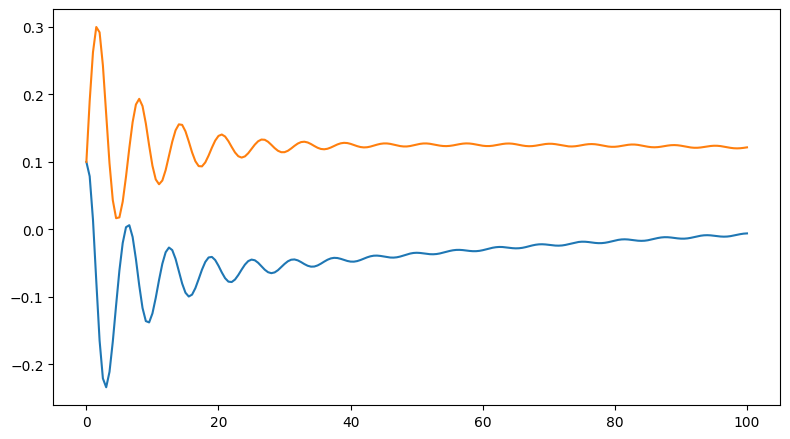

In [58]:
t = CF_sol.t
v1, v2, w1, w2 = CF_sol.y

plt.figure(figsize=(8, 4.5))
plt.plot(t, v1, label='v1(t)')
plt.plot(t, v2, label='v2(t)')
plt.tight_layout()
plt.show()

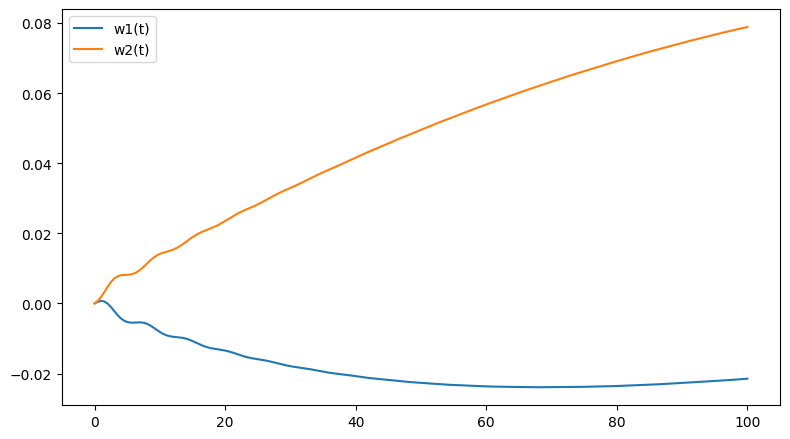

In [59]:
plt.figure(figsize=(8, 4.5))
plt.plot(t, w1, label='w1(t)')
plt.plot(t, w2, label='w2(t)')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
d_values = [[0.0,0.0],[0.0, 0.2], [-0.1, 0.2], [-0.3, 0.2], [-0.5, 0.2]]
CF_all_results = []
for d in d_values:

    t_eval = np.arange(0.0, 100.5, 0.5)

    CF_sol = solve_ivp(
        mod_fitzhugh,
        args = (a, b, c, I, d),
        t_span = (0.0, 100.0),
        t_eval = t_eval,
        y0=y0,
        method='BDF'
    )

    results = CF_sol.y.T
    CF_all_results.append(results)

In [61]:
for r in CF_all_results:
    print(r.shape)

A11, A12, A13, A14, A15 = CF_all_results

(201, 4)
(201, 4)
(201, 4)
(201, 4)
(201, 4)


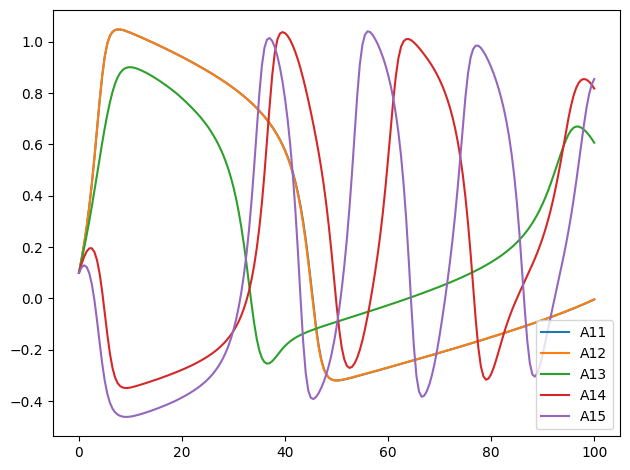

In [62]:

plt.plot(t_eval, A11[:, 0], label='A11') 
plt.plot(t_eval, A12[:, 0], label='A12')
plt.plot(t_eval, A13[:, 0], label='A13')
plt.plot(t_eval, A14[:, 0], label='A14')
plt.plot(t_eval, A15[:, 0], label='A15')
plt.legend()
plt.tight_layout()
plt.show()